## Introduction
-----
Estimate the resistance of an electrical component using a multimeter observations of voltage drop across the resistor at various current values. The voltage observations are tabulated below:

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |




In [39]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Store the voltage and current data as column vectors. The shape of I has to be (5,1) not (5,)
I = np.array([[0.2, 0.3, 0.4, 0.5, 0.6]]).T

#Remove one set of [] and try to estimate R

#I = np.array([0.2, 0.3, 0.4, 0.5, 0.6]).reshape(5,1)
V = np.array([1.23, 1.38, 2.06, 2.47, 3.17]).T
print(I.shape, V.shape)

(5, 1) (5,)


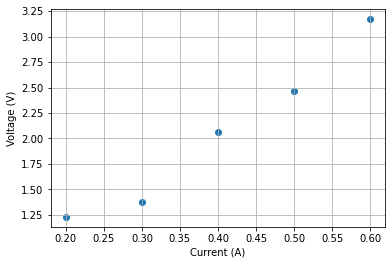

In [40]:
plt.scatter(I, V)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

## Estimating Resistance
----

Recall the linear measurement model and the parameter estimation $\hat{x}$ are given by the following relations:

\begin{align}
\mathbf{y} = \mathbf{H}x+\mathbf{v}\
\end{align}

\begin{align}
\hat{x} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

For a resitance parameter using voltage and the current, our measurement model is given by:  

\begin{align}
\mathbf{V} = \mathbf{I}R+\mathbf{v}\
\end{align}

The best estimated resistance is given by:   

\begin{align}
\hat{R} = \left(\mathbf{I}^T\mathbf{I}\right)^{-1}\mathbf{I}^T\mathbf{y}
\end{align}

where, $\mathbf{H=I}$, the partial derivative of the measurement model with respect to the parameter.

In [44]:
# Define the H matrix - the Jacobian 
H = I
print(H, H.shape)
# Now estimate the resistance parameter.
# R = ... 
R=np.matmul(H.T,H)
print(R, R.shape)
R=np.linalg.inv(R)
R=np.matmul(R,H.T)
R=np.matmul(R,V)
print('The resistance is : ',R, R[0])

[[0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]] (5, 1)
[[0.9]] (1, 1)
The resistance is :  [5.13444444] 5.134444444444445


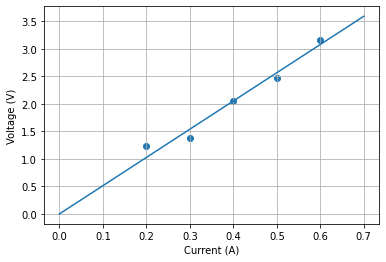

In [24]:
# Plot line.
I_line = np.arange(0, 0.8, 0.1).reshape(8, 1)
V_line = I_line*R

plt.scatter(I, V)
plt.plot(I_line, V_line)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()